**Nama:** Wildan Hidayaturrohman

**Cohort ID:** MC200D5Y1799

**Tugas:** Proyek Sentimen

## **Import Library**

In [11]:
!pip install google-play-scraper

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

# Pasang semua versi yang kompatibel:
!pip install sastrawi

import csv
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
import gdown
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
import xgboost as xgb
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
import requests
from io import StringIO

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## **Mengambil data hasil scraping**


In [2]:
# ID file Google Drive
file_id = '1Vqymqxcu3lng9Iz3td5o-gfzCWtPR3f2'

# Format URL untuk gdown
url = f"https://drive.google.com/uc?id={file_id}"

# Nama file output
output = "ulasan_aplikasi.csv"

# Unduh file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Vqymqxcu3lng9Iz3td5o-gfzCWtPR3f2
To: /content/ulasan_aplikasi.csv
100%|██████████| 33.3M/33.3M [00:00<00:00, 44.6MB/s]


'ulasan_aplikasi.csv'

**Memasukkan data csv pada dataframe**

In [3]:
clean_df = pd.read_csv("ulasan_aplikasi.csv")
clean_df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,5e546f3c-07b8-48a2-b6bd-06eb87328b8d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gimana mau belanja, update terus, tapi buruk k...",1,1,5.12,2018-09-23 20:08:52,Mohon maaf atas kendala teknis yang Anda alami...,2018-09-23 23:10:55,5.12
1,1,d4b43085-b00d-463e-8b75-4067c507acc0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sudah ke 4x nya dikecewakan sama program misi ...,1,0,7.73.0,2025-04-11 10:59:12,Kami sangat menghargai feedback Kakak tentang ...,2025-04-11 11:47:06,7.73.0
2,2,f824b66c-ea40-4472-beb5-3d82b1adf88a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kalo memang pengiriman sedang overload, fitur ...",1,0,7.72.0,2025-04-11 10:03:41,Terima kasih banyak atas masukan Kakak. Kami s...,2025-04-11 10:27:37,7.72.0
3,3,332a3a21-15c3-448d-9dc4-d727dcdb7d93,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apk nya berat bgt jadi lemot. padahal hp pake ...,1,1,7.72.0,2025-04-10 04:29:03,Kami sangat menghargai masukan Kakak mengenai ...,2025-04-10 04:47:06,7.72.0
4,4,ad5e60cb-dd9e-4f14-9ecd-3ef0eff5fb54,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"dari awal sih gue ragu soal apk ini, pas gilir...",1,0,7.72.0,2025-04-10 12:23:01,Kami sangat menghargai masukan Kakak mengenai ...,2025-04-10 12:52:16,7.72.0


In [4]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53471 entries, 0 to 53470
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            53471 non-null  int64 
 1   reviewId              53471 non-null  object
 2   userName              53471 non-null  object
 3   userImage             53471 non-null  object
 4   content               53471 non-null  object
 5   score                 53471 non-null  int64 
 6   thumbsUpCount         53471 non-null  int64 
 7   reviewCreatedVersion  53471 non-null  object
 8   at                    53471 non-null  object
 9   replyContent          53471 non-null  object
 10  repliedAt             53471 non-null  object
 11  appVersion            53471 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.9+ MB


## **Preprocessing Text**

In [5]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update([
        'iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah",
        'woi','woii','woy','bang', 'bro', 'sis', 'gan', 'om', 'mbak', 'mas', 'bu', 'pak',
        'lah', 'dong', 'deh', 'nih', 'tuh', 'kok', 'kayak', 'cuy', 'sob',
        'makasih', 'makasi', 'makas', 'thx', 'thanks',
        'hehe', 'haha', 'wkwk', 'wkwkwk', 'huhu', 'hadeh', 'ampun',
        'anjay', 'anjir', 'anjrit', 'astaga', 'walah', 'weleh', 'weleh2',
        'gitu', 'gini', 'aja', 'tau', 'dah', 'udah', 'sudah', 'belum',
        'tadi', 'besok', 'kemarin', 'kayaknya', 'sepertinya', 'gpp', 'gapapa',
        'oke', 'ok', 'bgt', 'banget', 'bener', 'benar', 'doang', 'cuma', 'cmn',
        'ih', 'eh', 'yaudah', 'ywdh', 'okey', 'sip', 'siap', 'siappp',
        'shopee', 'belanja', 'barang', 'produk', 'penjual', 'seller',
        'harga', 'murah', 'mahal', 'pengiriman', 'pesan', 'order', 'bayar', 'pembayaran',
        'voucher', 'diskon', 'promo', 'gratis', 'ongkir', 'kirim', 'paket', 'respon',
        'toko', 'terima', 'kualitas', 'pengemasan', 'cepat', 'lama', 'layanan',
        'transaksi', 'checkout', 'kurir', 'tokonya', 'tokonya', 'item', 'masuk',
        'dikirim', 'dibayar', 'dikemas', 'sampai', 'dapat', 'bagus', 'baik',
        'oke', 'ok', 'top', 'mantap', 'biasa', 'biasa2', 'lumayan', 'asli', 'ori',
        'original', 'recommended', 'rekomen', 'rekomendasi', 'bintang', 'rating', 'ulasan',
        'review', 'komentar', 'komplain', 'keluhan', 'masalah', 'kesalahan', 'kesel',
        'di', 'saya', 'dan', 'bisa', 'tidak', 'yang', 'ini', 'lagi', 'untuk', 'sudah',
        'ke', 'juga', 'dengan', 'dari', 'itu', 'karena', 'kita', 'atau', 'dalam', 'pada'
    ])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [6]:
slangwords = {
    "abis": "habis",
    "aj": "saja",
    "aja": "saja",
    "ato": "atau",
    "bgt": "banget",
    "bgd": "banget",
    "blm": "belum",
    "bkn": "bukan",
    "brg": "barang",
    "brgnya": "barangnya",
    "bnyk": "banyak",
    "cm": "cuma",
    "cma": "cuma",
    "dgn": "dengan",
    "dg": "dengan",
    "dlm": "dalam",
    "dr": "dari",
    "dtg": "datang",
    "g": "enggak",
    "ga": "enggak",
    "gak": "enggak",
    "gk": "enggak",
    "gpp": "tidak apa-apa",
    "gt": "gitu",
    "gitu": "begitu",
    "gw": "saya",
    "gue": "saya",
    "jd": "jadi",
    "jgn": "jangan",
    "kalo": "kalau",
    "kl": "kalau",
    "klo": "kalau",
    "km": "kamu",
    "kmrn": "kemarin",
    "knp": "kenapa",
    "krn": "karena",
    "lgi": "lagi",
    "lg": "lagi",
    "lbh": "lebih",
    "liat": "lihat",
    "mau": "ingin",
    "mkn": "makan",
    "mlm": "malam",
    "nnti": "nanti",
    "org": "orang",
    "pd": "pada",
    "pgn": "ingin",
    "pke": "pakai",
    "rmh": "rumah",
    "sblm": "sebelum",
    "sbnrnya": "sebenarnya",
    "skt": "sakit",
    "sy": "saya",
    "td": "tadi",
    "tdk": "tidak",
    "trs": "terus",
    "trs2an": "terus-terusan",
    "tp": "tapi",
    "udh": "sudah",
    "utk": "untuk",
    "yg": "yang",
    "ya": "iya",
    "y": "ya",
    "tokonya": "toko nya",
    "smpe": "sampai",
    "smpai": "sampai",
    "smp": "sampai",
    "dpt": "dapat",
    "kyk": "seperti",
    "kyknya": "sepertinya",
    "lgsng": "langsung",
    "lsg": "langsung",
    "rekomen": "rekomendasi",
    "rekomenin": "merekomen",
    "ori": "original",
    "palsu": "tidak asli",
    "ngaret": "terlambat",
    "ngirim": "mengirim",
    "ngilang": "hilang",
    "nyampe": "sampai",
    "bintang5": "bintang lima",
    "nunggu": "menunggu",
    "yg": "yang",
    "ya": "iya",
    "aku": "saya",
    "kak": "kakak",
    "hai": "halo",
    "hi": "halo",
    "dm": "direct message",
    "emng": "memang",
    "emang": "memang",
    "bener": "benar",
    "beneran": "benar-benar",
    "bener2": "benar-benar",
    "beneran2": "benar-benar",
    "pake": "pakai",
    "apk": "aplikasi",
    "cod": "cash on delivery",
    "codan": "cash on delivery",
    "karna": "karena",
    "sdh": "sudah",
    "udah": "sudah",
    "wkwk": "",
    "wkwwk": "",
    "hehe": "",
    "haha": ""
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [7]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [8]:
clean_df

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,0,5e546f3c-07b8-48a2-b6bd-06eb87328b8d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gimana mau belanja, update terus, tapi buruk k...",1,1,5.12,2018-09-23 20:08:52,Mohon maaf atas kendala teknis yang Anda alami...,2018-09-23 23:10:55,5.12,Gimana mau belanja update terus tapi buruk kem...,gimana mau belanja update terus tapi buruk kem...,gimana ingin belanja update terus tapi buruk k...,"[gimana, ingin, belanja, update, terus, tapi, ...","[gimana, update, buruk, kemajuannya, aplikasi,...",gimana update buruk kemajuannya aplikasi dibuk...
1,1,d4b43085-b00d-463e-8b75-4067c507acc0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sudah ke 4x nya dikecewakan sama program misi ...,1,0,7.73.0,2025-04-11 10:59:12,Kami sangat menghargai feedback Kakak tentang ...,2025-04-11 11:47:06,7.73.0,Sudah ke x nya dikecewakan sama program misi b...,sudah ke x nya dikecewakan sama program misi b...,sudah ke x nya dikecewakan sama program misi b...,"[sudah, ke, x, nya, dikecewakan, sama, program...","[x, dikecewakan, program, misi, berhadiah, laz...",x dikecewakan program misi berhadiah lazreward...
2,2,f824b66c-ea40-4472-beb5-3d82b1adf88a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kalo memang pengiriman sedang overload, fitur ...",1,0,7.72.0,2025-04-11 10:03:41,Terima kasih banyak atas masukan Kakak. Kami s...,2025-04-11 10:27:37,7.72.0,kalo memang pengiriman sedang overload fitur p...,kalo memang pengiriman sedang overload fitur p...,kalau memang pengiriman sedang overload fitur ...,"[kalau, memang, pengiriman, sedang, overload, ...","[overload, fitur, prioritas, jam, hilangin, pe...",overload fitur prioritas jam hilangin pengguna...
3,3,332a3a21-15c3-448d-9dc4-d727dcdb7d93,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apk nya berat bgt jadi lemot. padahal hp pake ...,1,1,7.72.0,2025-04-10 04:29:03,Kami sangat menghargai masukan Kakak mengenai ...,2025-04-10 04:47:06,7.72.0,apk nya berat bgt jadi lemot padahal hp pake s...,apk nya berat bgt jadi lemot padahal hp pake s...,aplikasi nya berat banget jadi lemot padahal h...,"[aplikasi, nya, berat, banget, jadi, lemot, pa...","[aplikasi, berat, lemot, hp, pakai, spek, gede...",aplikasi berat lemot hp pakai spek gede aplika...
4,4,ad5e60cb-dd9e-4f14-9ecd-3ef0eff5fb54,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"dari awal sih gue ragu soal apk ini, pas gilir...",1,0,7.72.0,2025-04-10 12:23:01,Kami sangat menghargai masukan Kakak mengenai ...,2025-04-10 12:52:16,7.72.0,dari awal sih gue ragu soal apk ini pas gilira...,dari awal sih gue ragu soal apk ini pas gilira...,dari awal sih saya ragu soal aplikasi ini pas ...,"[dari, awal, sih, saya, ragu, soal, aplikasi, ...","[ragu, aplikasi, pas, giliran, unduh, login, p...",ragu aplikasi pas giliran unduh login pas sesu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53466,103489,c1afecb7-60f8-4752-9656-d14681f8e3a4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,knapa punya saya gabusa metodepembayaran. baya...,5,0,7.56.0,2024-08-01 03:21:18,Kami mohon maaf atas ketidaknyamanan ini dan a...,2024-08-01 03:47:10,7.56.0,knapa punya saya gabusa metodepembayaran bayar...,knapa punya saya gabusa metodepembayaran bayar...,knapa punya saya gabusa metodepembayaran bayar...,"[knapa, punya, saya, gabusa, metodepembayaran,...","[knapa, gabusa, metodepembayaran, ditempat, ca...",knapa gabusa metodepembayaran ditempat cash de...
53467,103492,a42099ca-ab4b-4483-aba5-5e37a2425667,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa lazada sekarang banyak banget penipuan ...,2,7,6.84.2,2021-10-23 08:17:30,Kami mohon maaf atas ketidaknyamanan yang Anda...,2021-10-23 08:52:28,6.84.2,Kenapa

## **Pelabelan Data**

In [12]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Gagal mengambil positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Gagal mengambil negative lexicon data")

In [13]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    else:
      polarity = 'neutral'
    # Digunakan untuk menentukan polaritas netral

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [14]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    32890
negative    20581
Name: count, dtype: int64


**Visualisai Label**

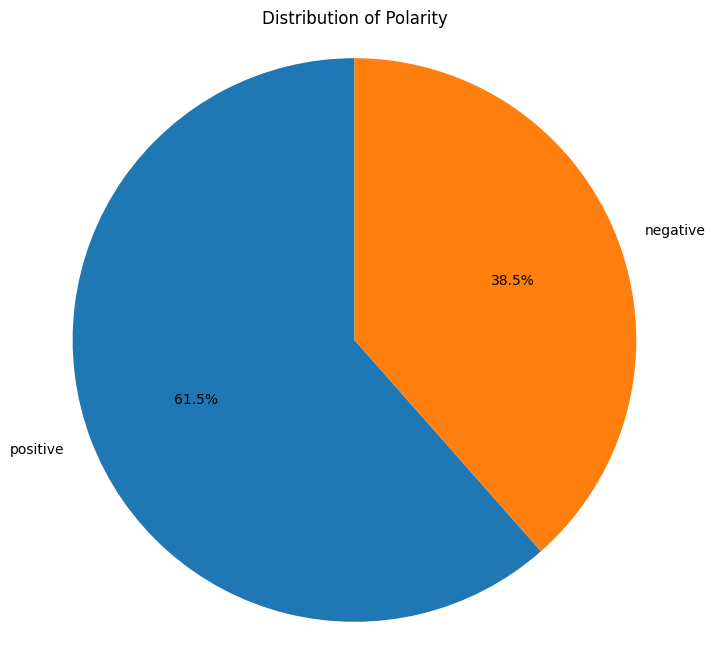

In [15]:
polarity_counts = clean_df['polarity'].value_counts()

# Menghitung jenis polarity dalam persen
polarity_percentages = polarity_counts / polarity_counts.sum() * 100

# Visualisai Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(polarity_percentages, labels=polarity_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Polarity')
plt.axis('equal')
plt.show()

**Note:** Terlihat bahwa komentar yang diberikan pada aplikasi Lazada didominasi oleh komentar-komentar positif. Besaran komentar positif 61.5% berbanding 38.5% untuk komentar negatif.

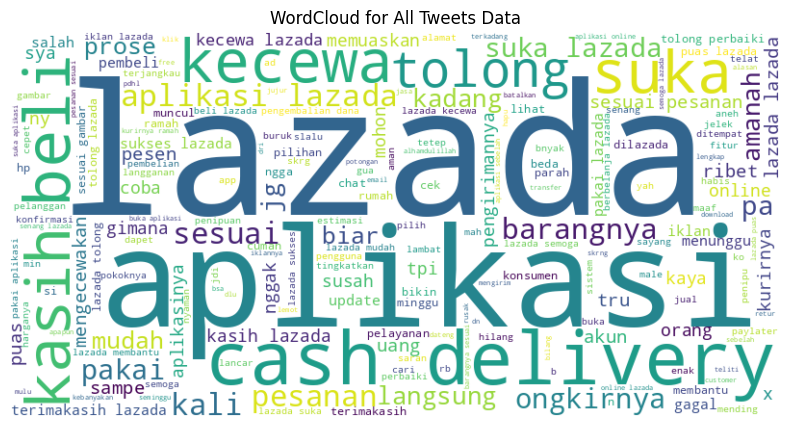

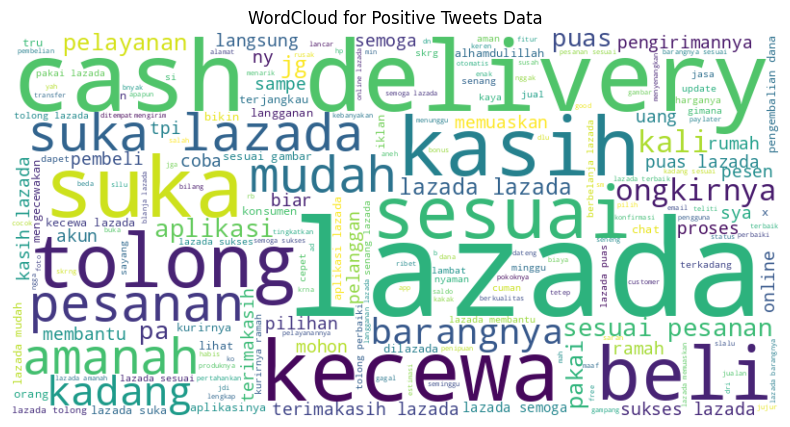

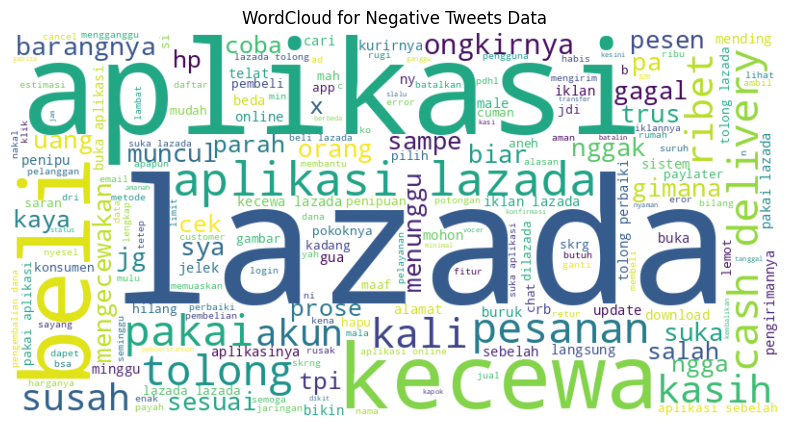

In [16]:
# Gabungkan semua teks positif
text_positive = " ".join(review for review in clean_df[clean_df["polarity"] == "positive"]["text_akhir"])

# Gabungkan semua teks negatif
text_negative = " ".join(review for review in clean_df[clean_df["polarity"] == "negative"]["text_akhir"])

# Gabungkan semua teks
text_all = " ".join(review for review in clean_df["text_akhir"])


def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Plot WordCloud untuk semua data
plot_wordcloud(text_all, "WordCloud for All Tweets Data")

# Plot WordCloud untuk tweet positif
plot_wordcloud(text_positive, "WordCloud for Positive Tweets Data")

# Plot WordCloud untuk tweet negatif
plot_wordcloud(text_negative, "WordCloud for Negative Tweets Data")

**Note:** Terlihat bahwa kata "lazada" dan "aplikasi" merupakan kata yang sering muncul pada komentar. Selain itu ada kata "kecewa", "sesuai" dan lain-lain pula yang sering muncul. Semakin besar sebuah kata, maka semakin sering frekuensi kemunculan dalam sebuah komentar

## **Ekstraksi Fitur**

**Data Splitting**

In [17]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

**Ekstraksi Fitur dengan TF-IDF 60/40**

In [24]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.4, random_state=42)

**Ekstraksi Fitur dengan TF-IDF 80/20**

In [25]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train_80_20, X_test_80_20, y_train_80_20, y_test_80_20 = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

**Ekstraksi Fitur dengan BoW 60/40**

In [26]:
# Ekstraksi Fitur dengan Bag of Words (BoW)
bow = CountVectorizer(max_features=200, min_df=17, max_df=0.8)
X_bow = bow.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y, test_size=0.4, random_state=42)

## **Modelling dengan Algoritma Machine Learning dan Evaluasi Akurasi**

**Skema 1 Pelatihan: SVM,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 60/40**

In [30]:
# Membuat objek model SVM
svm_model = SVC()

# Melatih model SVM pada data pelatihan
svm_model.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_model.predict(X_train.toarray())
y_pred_test_svm = svm_model.predict(X_test.toarray())

# Evaluasi akurasi model SVM
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

data = {
    'Model': ['SVM_TF-IDF_60/40'],
    'Akurasi Training': [accuracy_train_svm],
    'Akurasi Testing': [accuracy_test_svm]
}

df_evaluasi = pd.DataFrame(data)
df_evaluasi

,Model,Akurasi Training,Akurasi Testing
0,SVM_TF-IDF_60/40,0.903154,0.854785


**Skema 2 Pelatihan: Logistic Regression,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20**

In [31]:
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train_80_20.toarray(), y_train_80_20)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train_80_20.toarray())
y_pred_test_lr = logistic_regression.predict(X_test_80_20.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train_80_20)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test_80_20)

new_data = {
    'Model': ['Logistic Regression_TF-IDF_80/20'],
    'Akurasi Training': [accuracy_train_lr],
    'Akurasi Testing': [accuracy_test_lr]
}
df_evaluasi_lr = pd.DataFrame(new_data)
df_evaluasi = pd.concat([df_evaluasi, df_evaluasi_lr], ignore_index=True)
df_evaluasi

,Model,Akurasi Training,Akurasi Testing
0,SVM_TF-IDF_60/40,0.903154,0.854785
1,Logistic Regression_TF-IDF_80/20,0.856929,0.856194


**Skema 3 Pelatihan: Logistic Regression,    Ekstraksi Fitur: BoW,    Pembagian Data: 60/40**

In [32]:
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train_bow.toarray(), y_train_bow)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr_bow = logistic_regression.predict(X_train_bow.toarray())
y_pred_test_lr_bow = logistic_regression.predict(X_test_bow.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr_bow = accuracy_score(y_pred_train_lr_bow, y_train_bow)
accuracy_test_lr_bow = accuracy_score(y_pred_test_lr_bow, y_test_bow)

new_data = {
    'Model': ['Logistic Regression_BoW_60/40'],
    'Akurasi Training': [accuracy_train_lr_bow],
    'Akurasi Testing': [accuracy_test_lr_bow]
}
df_evaluasi_lr_bow = pd.DataFrame(new_data)
df_evaluasi = pd.concat([df_evaluasi, df_evaluasi_lr_bow], ignore_index=True)
df_evaluasi

,Model,Akurasi Training,Akurasi Testing
0,SVM_TF-IDF_60/40,0.903154,0.854785
1,Logistic Regression_TF-IDF_80/20,0.856929,0.856194
2,Logistic Regression_BoW_60/40,0.855277,0.857076
